In [1]:
import numpy as np
import pandas as pd
import scipy, scipy.stats
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.mixture import GMM
import seaborn as sns

In [2]:
data = pd.read_csv("data/zip.train", header=None, sep=" ")

In [55]:
data2 = pd.read_csv("data/zip.train", header=None, sep=" ")

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0,NaN
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,NaN
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0,NaN
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,NaN
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0,NaN


In [4]:
calc = data.iloc[:,1:-1]

In [5]:
calc.head()

,1,2,3,4,5,6,7,8,9,10,...,247,248,249,250,251,252,253,254,255,256
0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


# Gaussian

In [6]:
clusters = 10 # Angabe der Cluster

In [7]:
G = GaussianMixture(n_components=clusters,covariance_type='full').fit(calc)
data['cluster_idx'] = G.predict(calc)

In [8]:
data.sort_values(by=0).head()

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,cluster_idx
4749,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,NaN,9
4877,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.993,0.019,0.835,-0.257,...,0.879,0.082,-0.953,-1.000,-1.0,-1.0,-1.0,-1.0,NaN,1
4882,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.701,0.265,1.000,0.886,...,0.773,0.255,-0.099,-0.877,-1.0,-1.0,-1.0,-1.0,NaN,4
4890,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.205,0.999,0.679,-0.257,...,0.662,0.957,0.064,-0.736,-1.0,-1.0,-1.0,-1.0,NaN,1
898,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,0.404,1.000,0.174,...,0.333,-0.870,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,NaN,1


In [54]:
##1.Visualisierung 

In [10]:
data[data[0] == 0].groupby("cluster_idx").count()[0].keys()

Int64Index([1, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='cluster_idx')

In [11]:
bar_data = np.zeros((10,10))  
for digit in range(0,10):
    temp_result = data[data[0] == digit].groupby("cluster_idx").count()[0]
    clusters_keys = temp_result.keys()
    for cluster_idx in clusters_keys:
        bar_data[digit][cluster_idx] = temp_result[cluster_idx]

In [12]:
result_df = pd.DataFrame(bar_data, columns=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

In [13]:
result_df.head()

,a,b,c,d,e,f,g,h,i,j
0,0.0,314.0,0.0,4.0,356.0,1.0,9.0,9.0,7.0,494.0
1,0.0,2.0,3.0,0.0,0.0,1000.0,0.0,0.0,0.0,0.0
2,12.0,67.0,1.0,32.0,12.0,3.0,35.0,31.0,535.0,3.0
3,1.0,187.0,16.0,162.0,1.0,1.0,7.0,269.0,12.0,2.0
4,8.0,84.0,221.0,4.0,1.0,31.0,293.0,0.0,10.0,0.0


In [14]:
result_df_scaled = result_df.divide(result_df.sum(1), axis=0)

In [15]:
result_df_scaled.head()

,a,b,c,d,e,f,g,h,i,j
0,0.000000,0.262982,0.000000,0.003350,0.298157,0.000838,0.007538,0.007538,0.005863,0.413735
1,0.000000,0.001990,0.002985,0.000000,0.000000,0.995025,0.000000,0.000000,0.000000,0.000000
2,0.016416,0.091655,0.001368,0.043776,0.016416,0.004104,0.047880,0.042408,0.731874,0.004104
3,0.001520,0.284195,0.024316,0.246201,0.001520,0.001520,0.010638,0.408815,0.018237,0.003040
4,0.012270,0.128834,0.338957,0.006135,0.001534,0.047546,0.449387,0.000000,0.015337,0.000000


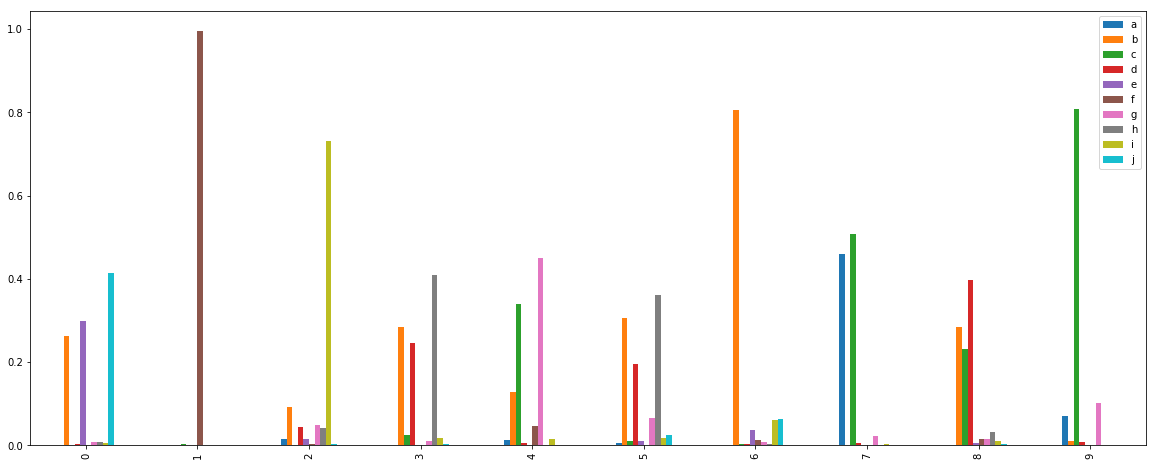

In [16]:
result_df_scaled.plot.bar(figsize=(20,8))

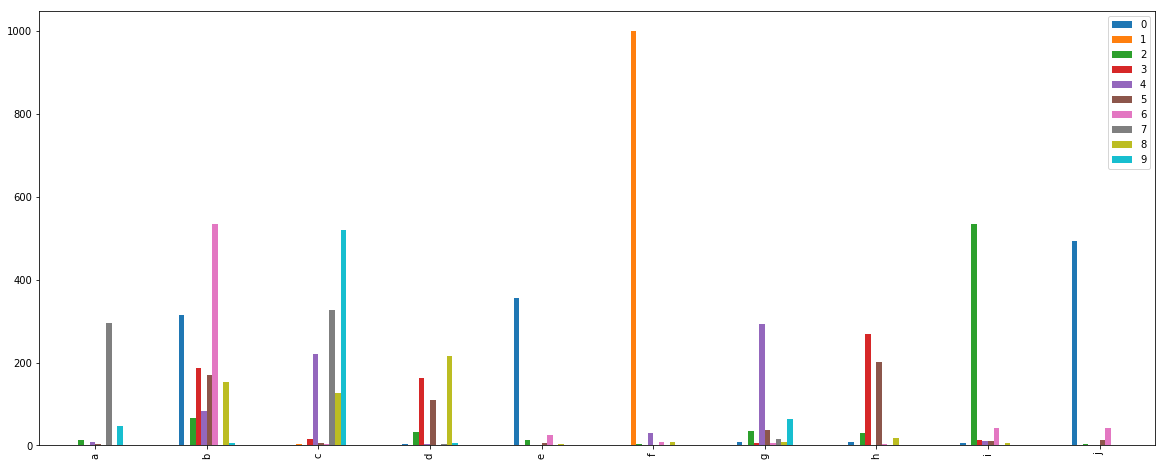

In [17]:
result_df.T.plot.bar(figsize=(20,8))

In [ ]:
##2.Visualisierung 

In [50]:
def getNumber(data, cluster):
    data_number = pd.DataFrame(data[data['cluster_idx'] == cluster]) 
    cluster_data = data_number.iloc[:,1:-2]
    return cluster_data

In [51]:
def getNumberImage(data, cluster, aggregation):
    # ruft die Hilfsfunktion getNumber auf um alle Bilddaten Daten zu einer Ziffer zu holen
    image_data = getNumber(data, cluster)
    # bilde aus allen Bildern zu der einen Ziffer ein aggrigiertes Bild
    if(aggregation == 'median'):
        df1 = pd.DataFrame(image_data.median())
    else:
        df1 = pd.DataFrame(image_data.mean())        
    
    # wandle das format von (1,256) -> (16,16) und gebe diesen transformierten DataFrame zurück
    return df1.values.reshape(16,16)

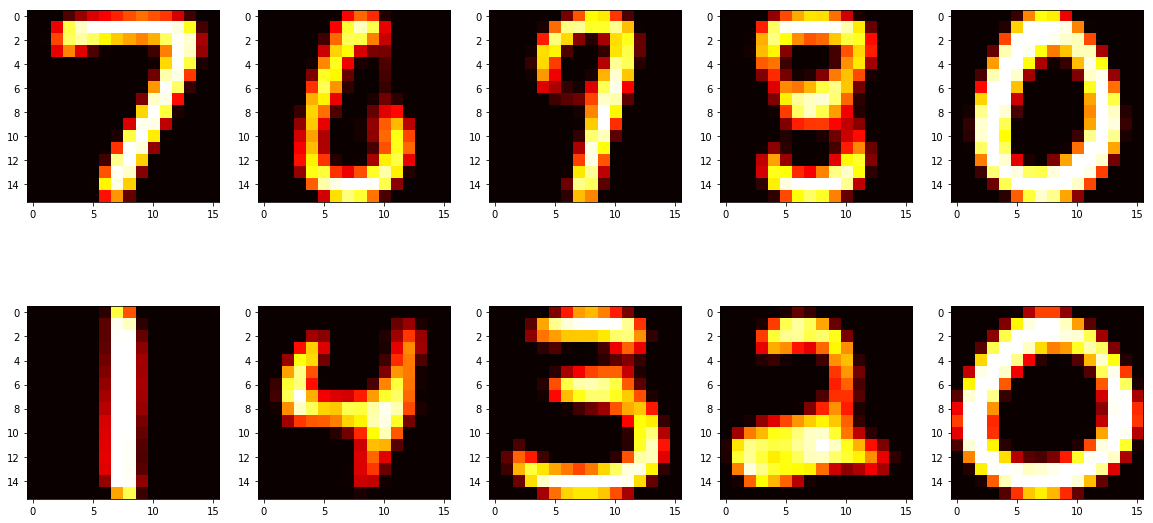

In [53]:
plt.figure(1, figsize=(20, 10))

for i in range(0,10):
    image = getNumberImage(data,i,'median')
    
    # Call signature: subplot(nrows, ncols, index, **kwargs)
    plt.subplot(2,5, 1 + i)
    plt.imshow(image, cmap='hot', interpolation='none')

plt.show()

# K-means

In [57]:
K = KMeans(n_clusters=clusters).fit(calc)
data2["cluster_idx"]=K.predict(calc)

In [62]:
def getNumber2(data2, cluster):
    data_number = pd.DataFrame(data2[data2['cluster_idx'] == cluster]) 
    cluster_data = data_number.iloc[:,1:-2]
    return cluster_data

In [63]:
def getNumberImage2(data2, cluster, aggregation):
    # ruft die Hilfsfunktion getNumber auf um alle Bilddaten Daten zu einer Ziffer zu holen
    image_data = getNumber2(data2, cluster)
    # bilde aus allen Bildern zu der einen Ziffer ein aggrigiertes Bild
    if(aggregation == 'median'):
        df1 = pd.DataFrame(image_data.median())
    else:
        df1 = pd.DataFrame(image_data.mean())        
    
    # wandle das format von (1,256) -> (16,16) und gebe diesen transformierten DataFrame zurück
    return df1.values.reshape(16,16)

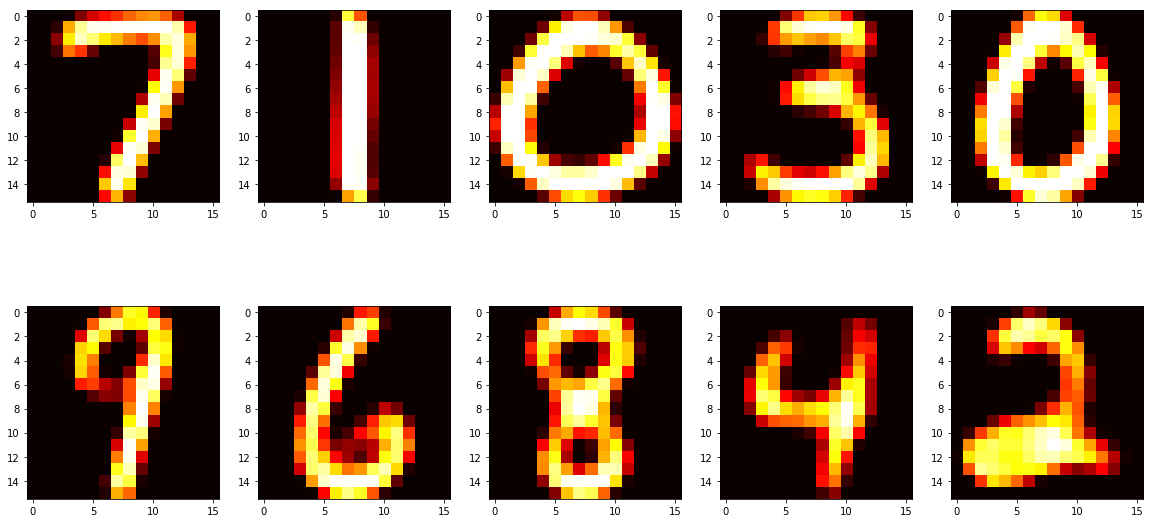

In [64]:
plt.figure(1, figsize=(20, 10))

for i in range(0,10):
    image = getNumberImage2(data2,i,'median')
    
    # Call signature: subplot(nrows, ncols, index, **kwargs)
    plt.subplot(2,5, 1 + i)
    plt.imshow(image, cmap='hot', interpolation='none')

plt.show()